## After installing the ANEC_data folder from Google Drive,
## your data_dir should be the path to ANEC_data folder

### Please edit the directory in the cell below

In [ ]:

data_dir = '/path/to/ANEC_data/folder/'

## Using your own data

### if you collected your own data, you have to change path1,path2, path3, and path4 in all the cells below.

508
374
350
348


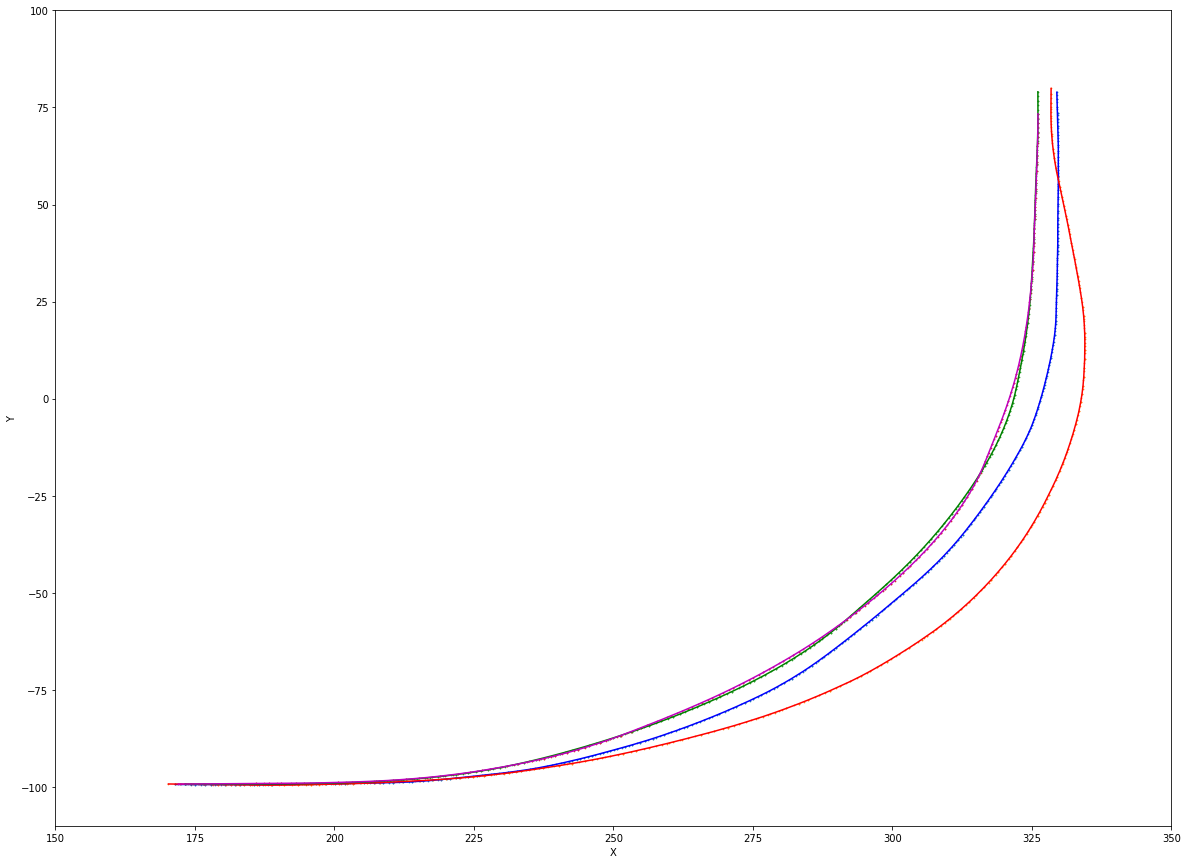

In [157]:
import matplotlib.pyplot as plt
import pandas as pd


cols_names = ['image_file_name', 'steering_angle', 'throttle', 'linux_time', 
              'velocity', 'velocity_x', 'velocity_y', 'velocity_z', 
              'position_x', 'position_y', 'position_z']


############### BM_18_Left ####################################################################
path1 = data_dir + 'left_turn/BM_18_Left/2022-06-15-14-15-04/2022-06-15-14-15-04.csv'
x1=[]
y1=[]

df1 = pd.read_csv(path1, names=cols_names, header=None)
print(len(df1))
x1 = df1['position_x']
y1 = df1['position_y']
fig, ax = plt.subplots(figsize=(20, 15))
ax.axis([150, 350, -110, 100])
ax.scatter(x1, y1, s=0.5)
plt.plot(x1, y1, 'b', linestyle="-", markersize=0.5 )

############### BM_25_Left ####################################################################
path2 = data_dir + 'left_turn/BM_25_Left/2022-06-15-14-12-41/2022-06-15-14-12-41.csv'
x2=[]
y2=[]

df2 = pd.read_csv(path2, names=cols_names, header=None)
print(len(df2))
x2 = df2['position_x']
y2 = df2['position_y']
ax.scatter(x2, y2, s=0.5)
plt.plot(x2, y2, 'r', linestyle="-", markersize=0.5 )

############### DCM_25_Left ####################################################################
path3 = data_dir + 'left_turn/DCM_25_Left/2022-06-15-14-17-25/2022-06-15-14-17-25.csv'
x3=[]
y3=[]

df3 = pd.read_csv(path3, names=cols_names, header=None)
print(len(df3))
x3 = df3['position_x']
y3 = df3['position_y']
ax.scatter(x3, y3, s=0.5)
plt.plot(x3, y3, 'g', linestyle="-", markersize=0.5 )

############### CombM_25_Left ####################################################################
path4 = data_dir + 'left_turn/CombM_25_Left/2022-06-15-14-19-58/2022-06-15-14-19-58.csv'
x4=[]
y4=[]

df4 = pd.read_csv(path4, names=cols_names, header=None)
print(len(df4))
x4 = df4['position_x']
y4 = df4['position_y']
ax.scatter(x4, y4, s=0.5)
plt.plot(x4, y4, 'm', linestyle="-", markersize=0.5 )

###############################################################################################

plt.xlabel("X")
plt.ylabel("Y")

plt.show()

In [1]:
# This function is used later

def truncate(x, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    x can be:
        - a list of numbers or
        - a number
    """
    if type(x) == list:
        numbers_list_trunc = []
        for number in x:
            if not isinstance(decimals, int):
                raise TypeError("decimal places must be an integer.")
            elif decimals < 0:
                raise ValueError("decimal places has to be 0 or more.")
            elif decimals == 0:
                number_trunc =  math.trunc(number)
                numbers_list_trunc. append(number_trunc)
            else:
                factor = 10.0 ** decimals
                number_trunc =  math.trunc(number * factor) / factor
                numbers_list_trunc. append(number_trunc)
        return numbers_list_trunc
    else:
        if not isinstance(decimals, int):
            raise TypeError("decimal places must be an integer.")
        elif decimals < 0:
            raise ValueError("decimal places has to be 0 or more.")
        elif decimals == 0:
            return math.trunc(x)

        factor = 10.0 ** decimals
        return math.trunc(x * factor) / factor

In [181]:
# testing the above function
x = [1, 2.555, 3.435656, -5.666, 5.0000]
print(truncate(x, 3))
print(truncate(5.04534, 3))
print(type(x)==list)

[1.0, 2.555, 3.435, -5.666, 5.0]
5.045
True


(0.0, 0.0, 3.717559593496844e-10, 0.0, 0.0)
(6.253970574907026, 10.653240894807508, 1020.5712308771157, 0.6671897145561545, 2150.5761445066432)
(6.336430601056971, 5.109316385543059, 882.9435736275839, 0.7160983298403556, 1630.5996735699646)
(6.661321876096768, 6.51469059915224, 897.8745680479443, 1.4646850503667062, 1682.0076215125907)


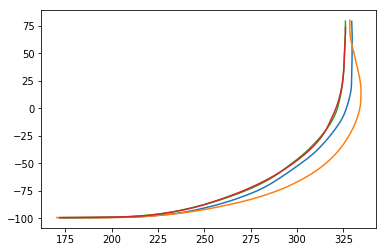

In [163]:
import similaritymeasures as sm

# BM_18_Left
BM_18_Left_curve = np.zeros((len(df1), 2))
BM_18_Left_curve[:, 0] = x1
BM_18_Left_curve[:, 1] = y1

# BM_25_Left
BM_25_Left_curve = np.zeros((len(df2), 2))
BM_25_Left_curve[:, 0] = x2
BM_25_Left_curve[:, 1] = y2

# DCM_25_Left
DCM_25_Left_curve = np.zeros((len(df3), 2))
DCM_25_Left_curve[:, 0] = x3
DCM_25_Left_curve[:, 1] = y3

# CombM_25_Left
CombM_25_Left_curve = np.zeros((len(df4), 2))
CombM_25_Left_curve[:, 0] = x4
CombM_25_Left_curve[:, 1] = y4

################ BM_18_Left  vs.  BM_18_Left #############################

# quantify the difference between the two curves using PCM
pcm11 = sm.pcm(BM_18_Left_curve, BM_18_Left_curve)

# quantify the difference between the two curves using
# Discrete Frechet distance
disf11 = sm.frechet_dist(BM_18_Left_curve, BM_18_Left_curve)

# quantify the difference between the two curves using
# area between two curves
area11 = sm.area_between_two_curves(BM_18_Left_curve, BM_18_Left_curve)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl11 = sm.curve_length_measure(BM_18_Left_curve, BM_18_Left_curve)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw11, d11 = sm.dtw(BM_18_Left_curve, BM_18_Left_curve)

# print the results
print(pcm11, disf11, area11, cl11, dtw11)

################ BM_18_Left  vs.  BM_25_Left_curve #############################

# quantify the difference between the two curves using PCM
pcm12 = sm.pcm(BM_18_Left_curve, BM_25_Left_curve)

# quantify the difference between the two curves using
# Discrete Frechet distance
disf12 = sm.frechet_dist(BM_18_Left_curve, BM_25_Left_curve)

# quantify the difference between the two curves using
# area between two curves
area12 = sm.area_between_two_curves(BM_18_Left_curve, BM_25_Left_curve)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl12 = sm.curve_length_measure(BM_18_Left_curve, BM_25_Left_curve)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw12, d12 = sm.dtw(BM_18_Left_curve, BM_25_Left_curve)

# print the results
print(pcm12, disf12, area12, cl12, dtw12)

################ BM_18_Left  vs.  DCM_25_Left #################################

# quantify the difference between the two curves using PCM
pcm13 = sm.pcm(BM_18_Left_curve, DCM_25_Left_curve)

# quantify the difference between the two curves using
# Discrete Frechet distance
disf13 = sm.frechet_dist(BM_18_Left_curve, DCM_25_Left_curve)

# quantify the difference between the two curves using
# area between two curves
area13 = sm.area_between_two_curves(BM_18_Left_curve, DCM_25_Left_curve)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl13 = sm.curve_length_measure(BM_18_Left_curve, DCM_25_Left_curve)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw13, d13 = sm.dtw(BM_18_Left_curve, DCM_25_Left_curve)

# print the results
print(pcm13, disf13, area13, cl13, dtw13)

################ BM_18_Left  vs.  CombM_25_Left ##############################

# quantify the difference between the two curves using PCM
pcm14 = sm.pcm(BM_18_Left_curve, CombM_25_Left_curve)

# quantify the difference between the two curves using
# Discrete Frechet distance
disf14 = sm.frechet_dist(BM_18_Left_curve, CombM_25_Left_curve)

# quantify the difference between the two curves using
# area between two curves
area14 = sm.area_between_two_curves(BM_18_Left_curve, CombM_25_Left_curve)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl14 = sm.curve_length_measure(BM_18_Left_curve, CombM_25_Left_curve)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw14, d14 = sm.dtw(BM_18_Left_curve, CombM_25_Left_curve)

# print the results
print(pcm14, disf14, area14, cl14, dtw14)

#############################################################################

# plot the data
plt.figure()
plt.plot(BM_18_Left_curve[:, 0], BM_18_Left_curve[:, 1])
plt.plot(BM_25_Left_curve[:, 0], BM_25_Left_curve[:, 1])
plt.plot(DCM_25_Left_curve[:, 0], DCM_25_Left_curve[:, 1])
plt.plot(CombM_25_Left_curve[:, 0], CombM_25_Left_curve[:, 1])

plt.show()


In [183]:
# Sequence of turns

In [2]:

import matplotlib.pyplot as plt
import pandas as pd


plt.rcParams.update({'font.size': 15})


cols_names = ['image_file_name', 'steering_angle', 'throttle', 'linux_time', 
              'velocity', 'velocity_x', 'velocity_y', 'velocity_z', 
              'position_x', 'position_y', 'position_z']


############### BM_18_sequence ####################################################################
path1 = data_dir + 'sequence_of_turns/BM_18_sequence/2022-06-16-16-25-52/2022-06-16-16-25-52.csv'
x1=[]
y1=[]

df1 = pd.read_csv(path1, names=cols_names, header=None)
print(len(df1))
x1 = df1['position_x']
y1 = df1['position_y']
fig, ax = plt.subplots(figsize=(20, 15))
ax.axis([x1.min() - 10, x1.max() + 10, y1.min() - 10, y1.max() + 10])
ax.scatter(x1, y1, s=0.5)
plt.plot(x1, y1, 'b', linestyle="-", markersize=0.5 )

############### BM_25_sequence ####################################################################
path2 = data_dir + 'sequence_of_turns/BM_25_sequence/2022-06-16-16-21-36/2022-06-16-16-21-36.csv'
x2=[]
y2=[]

df2 = pd.read_csv(path2, names=cols_names, header=None)
print(len(df2))
x2 = df2['position_x']
y2 = df2['position_y']
ax.scatter(x2, y2, s=0.5)
plt.plot(x2, y2, 'r', linestyle="-", markersize=0.5 )

############### DCM_25_sequence ####################################################################
path3 = data_dir + 'sequence_of_turns/DCM_25_sequence/2022-06-16-16-28-44/2022-06-16-16-28-44.csv'
x3=[]
y3=[]

df3 = pd.read_csv(path3, names=cols_names, header=None)
print(len(df3))
x3 = df3['position_x']
y3 = df3['position_y']
ax.scatter(x3, y3, s=0.5)
plt.plot(x3, y3, 'g', linestyle="-", markersize=0.5 )

############### CombM_25_sequence ####################################################################
path4 = data_dir + 'sequence_of_turns/CombM_25_sequence/2022-06-16-16-31-18/2022-06-16-16-31-18.csv'
x4=[]
y4=[]

df4 = pd.read_csv(path4, names=cols_names, header=None)
print(len(df4))
x4 = df4['position_x']
y4 = df4['position_y']
ax.scatter(x4, y4, s=0.5)
plt.plot(x4, y4, 'm', linestyle="-", markersize=0.5 )

###############################################################################################

plt.xlabel("X")
plt.ylabel("Y")

plt.show()

1425
1249
1197
1213


<Figure size 2000x1500 with 1 Axes>

In [5]:
import similaritymeasures as sm

# BM_18_Left
BM_18_Left_curve = np.zeros((len(df1), 2))
BM_18_Left_curve[:, 0] = x1
BM_18_Left_curve[:, 1] = y1

# BM_25_Left
BM_25_Left_curve = np.zeros((len(df2), 2))
BM_25_Left_curve[:, 0] = x2
BM_25_Left_curve[:, 1] = y2

# DCM_25_Left
DCM_25_Left_curve = np.zeros((len(df3), 2))
DCM_25_Left_curve[:, 0] = x3
DCM_25_Left_curve[:, 1] = y3

# CombM_25_Left
CombM_25_Left_curve = np.zeros((len(df4), 2))
CombM_25_Left_curve[:, 0] = x4
CombM_25_Left_curve[:, 1] = y4

################ BM_18_Left  vs.  BM_18_Left #############################

# quantify the difference between the two curves using PCM
pcm11 = sm.pcm(BM_18_Left_curve, BM_18_Left_curve)

# quantify the difference between the two curves using
# Discrete Frechet distance
disf11 = sm.frechet_dist(BM_18_Left_curve, BM_18_Left_curve)

# quantify the difference between the two curves using
# area between two curves
area11 = sm.area_between_two_curves(BM_18_Left_curve, BM_18_Left_curve)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl11 = sm.curve_length_measure(BM_18_Left_curve, BM_18_Left_curve)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw11, d11 = sm.dtw(BM_18_Left_curve, BM_18_Left_curve)

# print the results
print(pcm11, disf11, area11, cl11, dtw11)

################ BM_18_Left  vs.  BM_25_Left_curve #############################

# quantify the difference between the two curves using PCM
pcm12 = sm.pcm(BM_18_Left_curve, BM_25_Left_curve)

# quantify the difference between the two curves using
# Discrete Frechet distance
disf12 = sm.frechet_dist(BM_18_Left_curve, BM_25_Left_curve)

# quantify the difference between the two curves using
# area between two curves
area12 = sm.area_between_two_curves(BM_18_Left_curve, BM_25_Left_curve)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl12 = sm.curve_length_measure(BM_18_Left_curve, BM_25_Left_curve)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw12, d12 = sm.dtw(BM_18_Left_curve, BM_25_Left_curve)

# print the results
print(pcm12, disf12, area12, cl12, dtw12)

################ BM_18_Left  vs.  DCM_25_Left #################################

# quantify the difference between the two curves using PCM
pcm13 = sm.pcm(BM_18_Left_curve, DCM_25_Left_curve)

# quantify the difference between the two curves using
# Discrete Frechet distance
disf13 = sm.frechet_dist(BM_18_Left_curve, DCM_25_Left_curve)

# quantify the difference between the two curves using
# area between two curves
area13 = sm.area_between_two_curves(BM_18_Left_curve, DCM_25_Left_curve)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl13 = sm.curve_length_measure(BM_18_Left_curve, DCM_25_Left_curve)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw13, d13 = sm.dtw(BM_18_Left_curve, DCM_25_Left_curve)

# print the results
print(pcm13, disf13, area13, cl13, dtw13)

################ BM_18_Left  vs.  CombM_25_Left ##############################

# quantify the difference between the two curves using PCM
pcm14 = sm.pcm(BM_18_Left_curve, CombM_25_Left_curve)

# quantify the difference between the two curves using
# Discrete Frechet distance
disf14 = sm.frechet_dist(BM_18_Left_curve, CombM_25_Left_curve)

# quantify the difference between the two curves using
# area between two curves
area14 = sm.area_between_two_curves(BM_18_Left_curve, CombM_25_Left_curve)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl14 = sm.curve_length_measure(BM_18_Left_curve, CombM_25_Left_curve)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw14, d14 = sm.dtw(BM_18_Left_curve, CombM_25_Left_curve)

# print the results
print(pcm14, disf14, area14, cl14, dtw14)



(0.0, 0.0, 3.086370270466432e-09, 0.0, 0.0)
(9.295384449570495, 10.525674348842932, 1692.0513104949575, 3.152947120973197, 4143.479761436924)
(7.008108441974397, 5.234414015385538, 1472.9774703147182, 1.1341449728111217, 2950.074911666603)
(3.1238873371555496, 3.742844609489023, 818.1139863153462, 0.9450197121176299, 1313.58735379133)


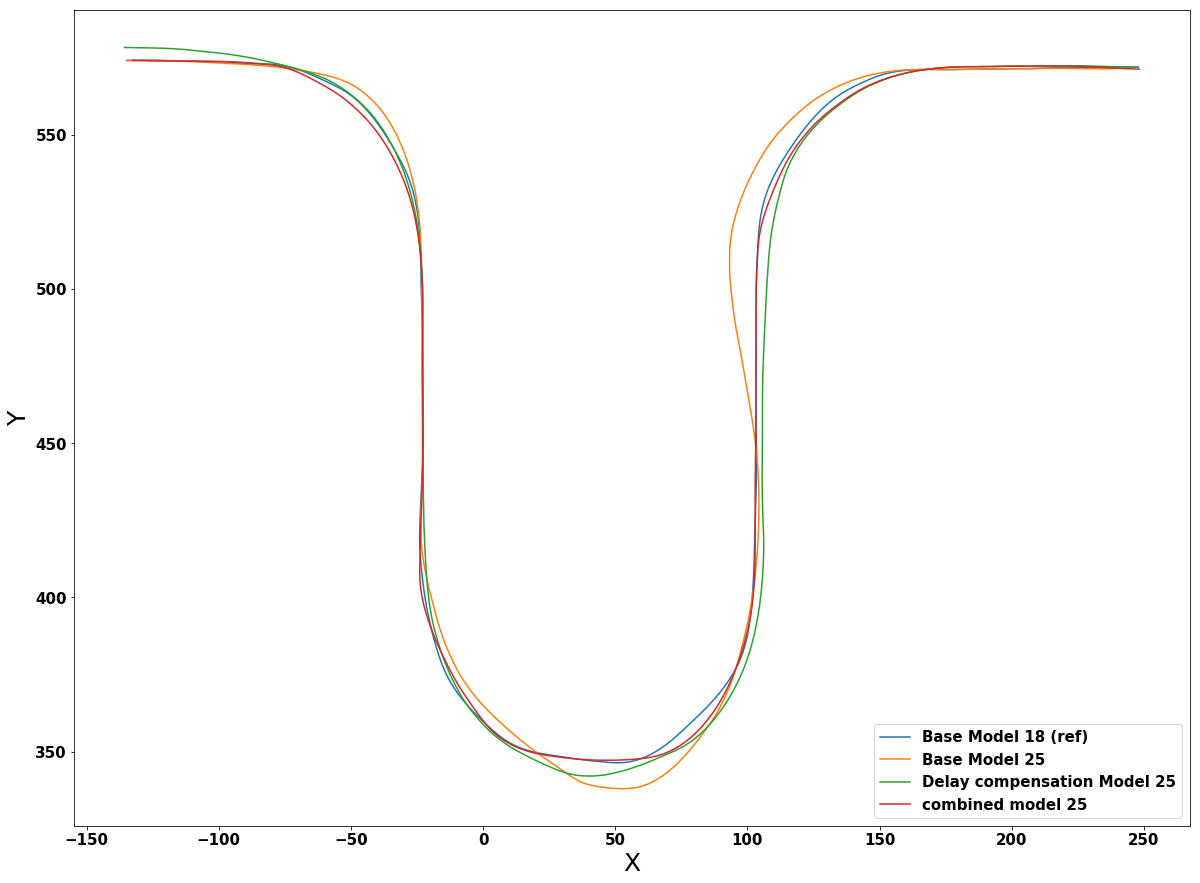

In [240]:
# plot the data
plt.figure(figsize=(20, 15))
plt.plot(BM_18_Left_curve[:, 0], BM_18_Left_curve[:, 1], label="Base Model 18 (ref)")
plt.plot(BM_25_Left_curve[:, 0], BM_25_Left_curve[:, 1], label="Base Model 25")
plt.plot(DCM_25_Left_curve[:, 0], DCM_25_Left_curve[:, 1], label="Delay compensation Model 25")
plt.plot(CombM_25_Left_curve[:, 0], CombM_25_Left_curve[:, 1], label="combined model 25")
plt.legend(loc="lower right", fontsize=15)
plt.xlabel("X", fontsize=25)
plt.ylabel("Y", fontsize=25)
plt.show()

In [ ]:
##### FINAL #####

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import similaritymeasures as sm
import numpy as np
import math

plt.rcParams.update({'font.size': 15})

cols_names = ['image_file_name', 'steering_angle', 'throttle', 'linux_time', 
              'velocity', 'velocity_x', 'velocity_y', 'velocity_z', 
              'position_x', 'position_y', 'position_z']


############### BM_18_sequence ####################################################################
path1 = data_dir + 'sequence_of_turns/BM_18_sequence/2022-06-16-16-25-52/2022-06-16-16-25-52.csv'
x1=[]
y1=[]

df1 = pd.read_csv(path1, names=cols_names, header=None)
print(len(df1))
x1 = df1['position_x']
y1 = df1['position_y']

BM_18_Left_curve = np.zeros((len(df1), 2))
BM_18_Left_curve[:, 0] = x1
BM_18_Left_curve[:, 1] = y1

############### BM_25_sequence ####################################################################
path2 = data_dir + 'sequence_of_turns/BM_25_sequence/2022-06-16-16-21-36/2022-06-16-16-21-36.csv'
x2=[]
y2=[]

df2 = pd.read_csv(path2, names=cols_names, header=None)
print(len(df2))
x2 = df2['position_x']
y2 = df2['position_y']

BM_25_Left_curve = np.zeros((len(df2), 2))
BM_25_Left_curve[:, 0] = x2
BM_25_Left_curve[:, 1] = y2

############### DCM_25_sequence ####################################################################
path3 = data_dir + 'sequence_of_turns/DCM_25_sequence/2022-06-16-16-28-44/2022-06-16-16-28-44.csv'
x3=[]
y3=[]

df3 = pd.read_csv(path3, names=cols_names, header=None)
print(len(df3))
x3 = df3['position_x']
y3 = df3['position_y']

DCM_25_Left_curve = np.zeros((len(df3), 2))
DCM_25_Left_curve[:, 0] = x3
DCM_25_Left_curve[:, 1] = y3

############### CombM_25_sequence ####################################################################
path4 = data_dir + 'sequence_of_turns/CombM_25_sequence/2022-06-16-16-31-18/2022-06-16-16-31-18.csv'
x4=[]
y4=[]

df4 = pd.read_csv(path4, names=cols_names, header=None)
print(len(df4))
x4 = df4['position_x']
y4 = df4['position_y']

CombM_25_Left_curve = np.zeros((len(df4), 2))
CombM_25_Left_curve[:, 0] = x4
CombM_25_Left_curve[:, 1] = y4

###############################################################################################


1425
1249
1197
1213


In [7]:
## COMPARISON

################ BM_18_Left  vs.  BM_18_Left #############################

# quantify the difference between the two curves using PCM
pcm11 = sm.pcm(BM_18_Left_curve, BM_18_Left_curve)

# quantify the difference between the two curves using
# Discrete Frechet distance
disf11 = sm.frechet_dist(BM_18_Left_curve, BM_18_Left_curve)

# quantify the difference between the two curves using
# area between two curves
area11 = sm.area_between_two_curves(BM_18_Left_curve, BM_18_Left_curve)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl11 = sm.curve_length_measure(BM_18_Left_curve, BM_18_Left_curve)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw11, d11 = sm.dtw(BM_18_Left_curve, BM_18_Left_curve)

# print the results
print(pcm11, disf11, truncate(area11, 4), cl11, dtw11)

################ BM_18_Left  vs.  BM_25_Left_curve #############################

# quantify the difference between the two curves using PCM
pcm12 = sm.pcm(BM_18_Left_curve, BM_25_Left_curve)

# quantify the difference between the two curves using
# Discrete Frechet distance
disf12 = sm.frechet_dist(BM_18_Left_curve, BM_25_Left_curve)

# quantify the difference between the two curves using
# area between two curves
area12 = sm.area_between_two_curves(BM_18_Left_curve, BM_25_Left_curve)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl12 = sm.curve_length_measure(BM_18_Left_curve, BM_25_Left_curve)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw12, d12 = sm.dtw(BM_18_Left_curve, BM_25_Left_curve)

# print the results
print(pcm12, disf12, area12, cl12, dtw12)

################ BM_18_Left  vs.  DCM_25_Left #################################

# quantify the difference between the two curves using PCM
pcm13 = sm.pcm(BM_18_Left_curve, DCM_25_Left_curve)

# quantify the difference between the two curves using
# Discrete Frechet distance
disf13 = sm.frechet_dist(BM_18_Left_curve, DCM_25_Left_curve)

# quantify the difference between the two curves using
# area between two curves
area13 = sm.area_between_two_curves(BM_18_Left_curve, DCM_25_Left_curve)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl13 = sm.curve_length_measure(BM_18_Left_curve, DCM_25_Left_curve)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw13, d13 = sm.dtw(BM_18_Left_curve, DCM_25_Left_curve)

# print the results
print(pcm13, disf13, area13, cl13, dtw13)

################ BM_18_Left  vs.  CombM_25_Left ##############################

# quantify the difference between the two curves using PCM
pcm14 = sm.pcm(BM_18_Left_curve, CombM_25_Left_curve)

# quantify the difference between the two curves using
# Discrete Frechet distance
disf14 = sm.frechet_dist(BM_18_Left_curve, CombM_25_Left_curve)

# quantify the difference between the two curves using
# area between two curves
area14 = sm.area_between_two_curves(BM_18_Left_curve, CombM_25_Left_curve)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl14 = sm.curve_length_measure(BM_18_Left_curve, CombM_25_Left_curve)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw14, d14 = sm.dtw(BM_18_Left_curve, CombM_25_Left_curve)

# print the results
print(pcm14, disf14, area14, cl14, dtw14)

(0.0, 0.0, 0.0, 0.0, 0.0)
(9.295384449570495, 10.525674348842932, 1692.0513104949575, 3.152947120973197, 4143.479761436924)
(7.008108441974397, 5.234414015385538, 1472.9774703147182, 1.1341449728111217, 2950.074911666603)
(3.1238873371555496, 3.742844609489023, 818.1139863153462, 0.9450197121176299, 1313.58735379133)


In [8]:
## Table

from tabulate import tabulate

data = [["Base Model 18 (ref)", pcm11, disf11, truncate(area11, 4), cl11, dtw11], 
        ["Base Model 25", pcm12, disf12, area12, cl12, dtw12], 
#         ["Delay compensation Model 25", pcm13, disf13, area13, cl13, dtw13], 
        ["Predictive Model 25", pcm13, disf13, area13, cl13, dtw13], 
#         ["combined model 25", pcm14, disf14, area14, cl14, dtw14]]
        ["Ensemble model 25", pcm14, disf14, area14, cl14, dtw14]]

#define header names
col_names = ["Partial\ncurve\nmapping", "Frechet\ndistance", 
             "Area\nbetween\ntwo curves", "Curve\nlength", 
             "Dynamic\ntime\nwarping"]

comp_tbl = tabulate(data, headers=col_names)

#display table
print(comp_tbl)


                       Partial     Frechet          Area     Curve    Dynamic
                         curve    distance       between    length       time
                       mapping                two curves              warping
-------------------  ---------  ----------  ------------  --------  ---------
Base Model 18 (ref)    0           0               0       0             0
Base Model 25          9.29538    10.5257       1692.05    3.15295    4143.48
Predictive Model 25    7.00811     5.23441      1472.98    1.13414    2950.07
Ensemble model 25      3.12389     3.74284       818.114   0.94502    1313.59


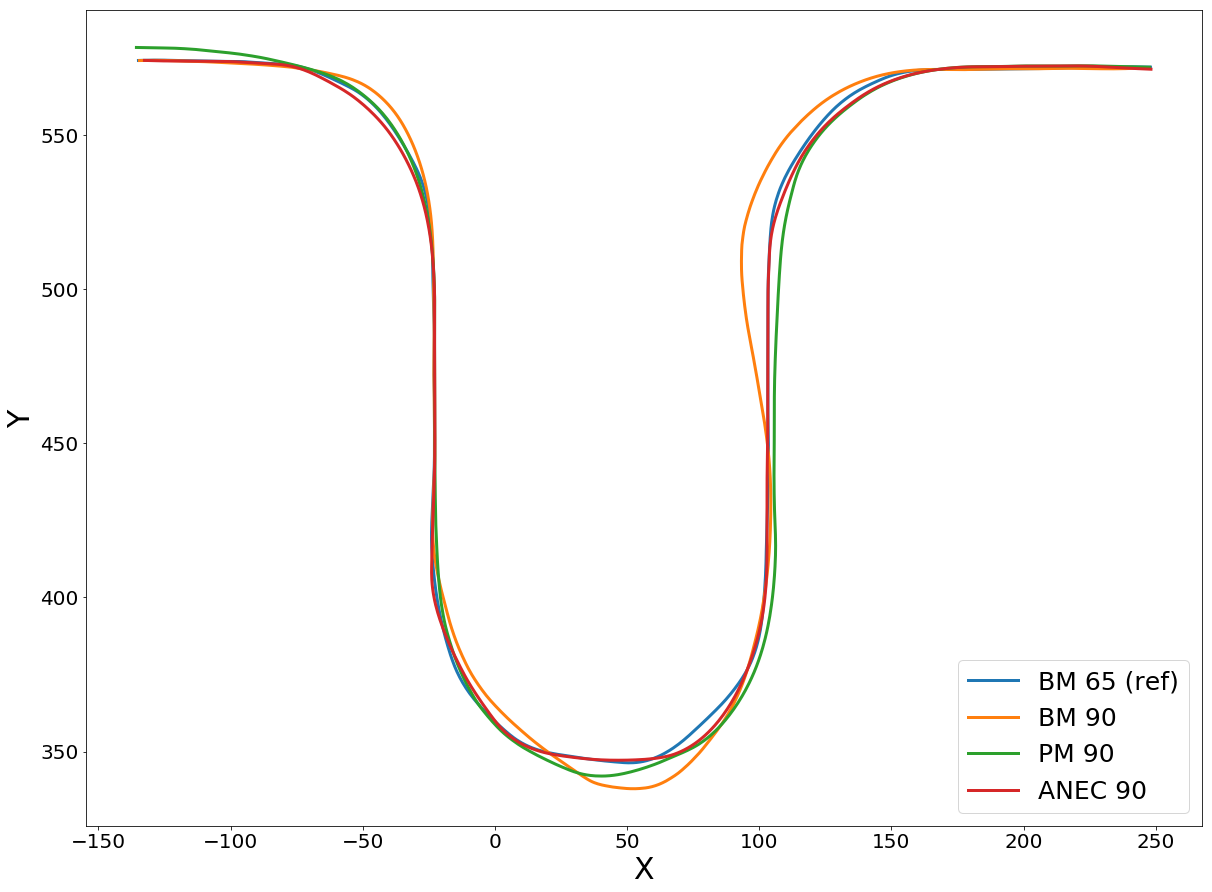

In [11]:
## PLOTTING

plt.figure(figsize=(20, 15))
plt.plot(BM_18_Left_curve[:, 0], BM_18_Left_curve[:, 1], label="BM 65 (ref)", linewidth=3)
plt.plot(BM_25_Left_curve[:, 0], BM_25_Left_curve[:, 1], label="BM 90", linewidth=3)
# plt.plot(DCM_25_Left_curve[:, 0], DCM_25_Left_curve[:, 1], label="Delay compensation Model 25")
plt.plot(DCM_25_Left_curve[:, 0], DCM_25_Left_curve[:, 1], label="PM 90", linewidth=3)
# plt.plot(CombM_25_Left_curve[:, 0], CombM_25_Left_curve[:, 1], label="combined model 25")
plt.plot(CombM_25_Left_curve[:, 0], CombM_25_Left_curve[:, 1], label="ANEC 90", linewidth=3)
plt.legend(loc="lower right", fontsize=25)
plt.xlabel("X", fontsize=30)
plt.ylabel("Y", fontsize=30)
plt.show()

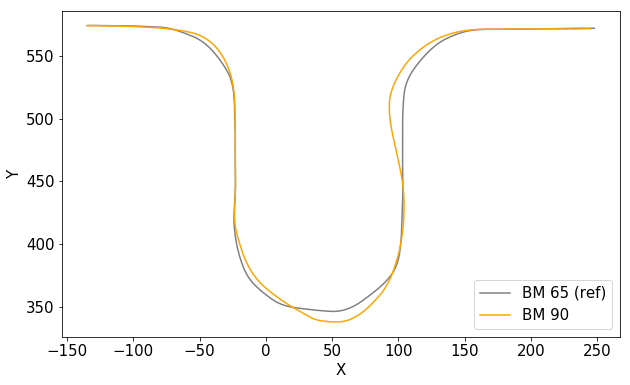

In [57]:
# BM 65 vs. BM 90

plt.figure(figsize=(10, 6))
plt.plot(BM_18_Left_curve[:, 0], BM_18_Left_curve[:, 1], label="BM 65 (ref)", linewidth=1.5, color='grey')
plt.plot(BM_25_Left_curve[:, 0], BM_25_Left_curve[:, 1], label="BM 90", linewidth=1.5, color='orange')
# plt.plot(DCM_25_Left_curve[:, 0], DCM_25_Left_curve[:, 1], label="Delay compensation Model 25")
# plt.plot(DCM_25_Left_curve[:, 0], DCM_25_Left_curve[:, 1], label="PM 90", linewidth=3)
# # plt.plot(CombM_25_Left_curve[:, 0], CombM_25_Left_curve[:, 1], label="combined model 25")
# plt.plot(CombM_25_Left_curve[:, 0], CombM_25_Left_curve[:, 1], label="ANEC 90", linewidth=3)
plt.legend(loc="lower right", fontsize=15)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
plt.show()

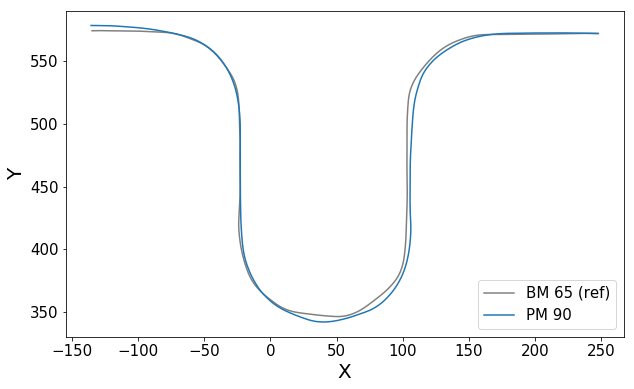

In [58]:
# BM 65 vs. PM 90


plt.figure(figsize=(10, 6))
plt.plot(BM_18_Left_curve[:, 0], BM_18_Left_curve[:, 1], label="BM 65 (ref)", linewidth=1.5, color='grey')
# plt.plot(BM_25_Left_curve[:, 0], BM_25_Left_curve[:, 1], label="BM 90", linewidth=3)
# plt.plot(DCM_25_Left_curve[:, 0], DCM_25_Left_curve[:, 1], label="Delay compensation Model 25")
plt.plot(DCM_25_Left_curve[:, 0], DCM_25_Left_curve[:, 1], label="PM 90", linewidth=1.5)
# plt.plot(CombM_25_Left_curve[:, 0], CombM_25_Left_curve[:, 1], label="combined model 25")
# plt.plot(CombM_25_Left_curve[:, 0], CombM_25_Left_curve[:, 1], label="ANEC 90", linewidth=3)
plt.legend(loc="lower right", fontsize=15)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.show()

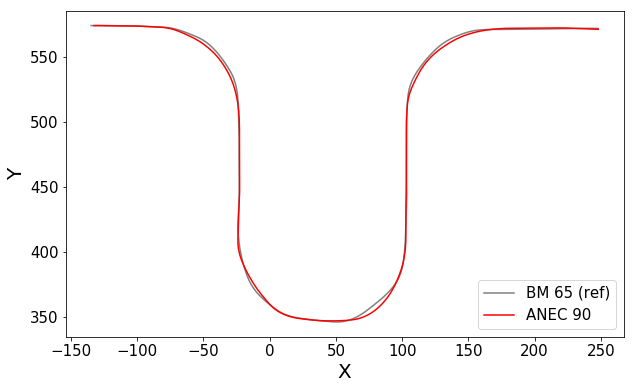

In [59]:
# BM 65 vs. ANEC 90


plt.figure(figsize=(10, 6))
plt.plot(BM_18_Left_curve[:, 0], BM_18_Left_curve[:, 1], label="BM 65 (ref)", linewidth=1.5, color='grey')
# plt.plot(BM_25_Left_curve[:, 0], BM_25_Left_curve[:, 1], label="BM 90", linewidth=3)
# plt.plot(DCM_25_Left_curve[:, 0], DCM_25_Left_curve[:, 1], label="Delay compensation Model 25")
# plt.plot(DCM_25_Left_curve[:, 0], DCM_25_Left_curve[:, 1], label="PM 90", linewidth=3)
# plt.plot(CombM_25_Left_curve[:, 0], CombM_25_Left_curve[:, 1], label="combined model 25")
plt.plot(CombM_25_Left_curve[:, 0], CombM_25_Left_curve[:, 1], label="ANEC 90", linewidth=1.5, color='r')
plt.legend(loc="lower right", fontsize=15)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(20, 15))
plt.plot(BM_18_Left_curve[:, 0], BM_18_Left_curve[:, 1], label="BM 65 (ref)", linewidth=3)
plt.plot(BM_25_Left_curve[:, 0], BM_25_Left_curve[:, 1], label="BM 90", linewidth=3)
# plt.plot(DCM_25_Left_curve[:, 0], DCM_25_Left_curve[:, 1], label="Delay compensation Model 25")
plt.plot(DCM_25_Left_curve[:, 0], DCM_25_Left_curve[:, 1], label="PM 90", linewidth=3)
# plt.plot(CombM_25_Left_curve[:, 0], CombM_25_Left_curve[:, 1], label="combined model 25")
plt.plot(CombM_25_Left_curve[:, 0], CombM_25_Left_curve[:, 1], label="ANEC 90", linewidth=3)
plt.legend(loc="lower right", fontsize=25)
plt.xlabel("X", fontsize=30)
plt.ylabel("Y", fontsize=30)
plt.show()